In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy

In [2]:
def beta_pdf(x, a, b):
    return scipy.stats.beta.pdf(x, a, b)

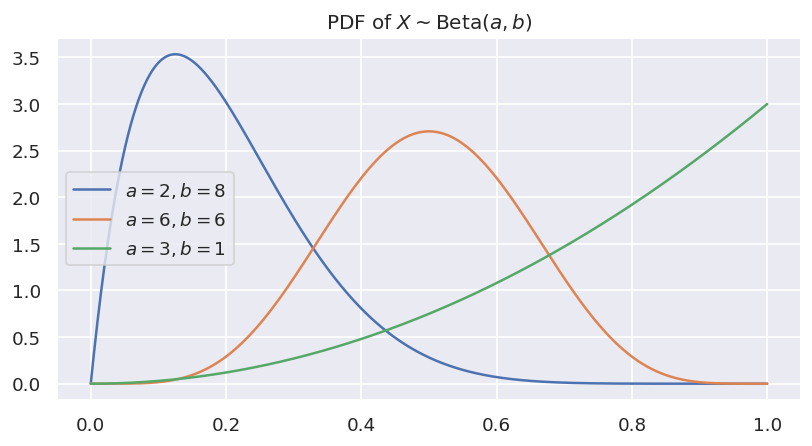

In [3]:
As = [2, 6, 3]
Bs = [8, 6, 1]

fig = plt.figure(figsize=(8, 4), dpi=120)
x = np.linspace(start=0, stop=1, num=1000)
for A, B in zip(As, Bs):
    f = beta_pdf(x, A, B)
    plt.plot(x, f, label=f'$a = {A}, b = {B}$')
plt.title('PDF of $X \sim$Beta$(a, b)$')
plt.legend()
plt.show()

In [4]:
def rejection_sampling(p_pdf, q_pdf, q_sample, M, N=1):
    arr = np.zeros(N)
    cnt = 0

    while cnt < N:
        y = q_sample()
        u = np.random.rand()
        if u < p_pdf(y) / (M * q_pdf(y)):
            arr[cnt] = y
            cnt += 1
    return arr

In [5]:
def uniform_pdf(x, a=0.0, b=1.0):
    return 1.0 * (a <= x) * (x <= b)

def uniform_sample(a=0.0, b=1.0):
    return np.random.rand() * (b - a) + a

In [6]:
a1 = 2
b1 = 8
N1 = 5000

p_pdf = lambda x: beta_pdf(x, a1, b1)
q_pdf = uniform_pdf
q_sample = uniform_sample
M = 4.0
X1 = rejection_sampling(p_pdf, q_pdf, q_sample, 4.0, N=N1)

In [7]:
a2 = 3
b2 = 1
N2 = 5000

p_pdf = lambda x: beta_pdf(x, a2, b2)
q_pdf = uniform_pdf
q_sample = uniform_sample
M = 4.0
X2 = rejection_sampling(p_pdf, q_pdf, q_sample, M, N=N2)

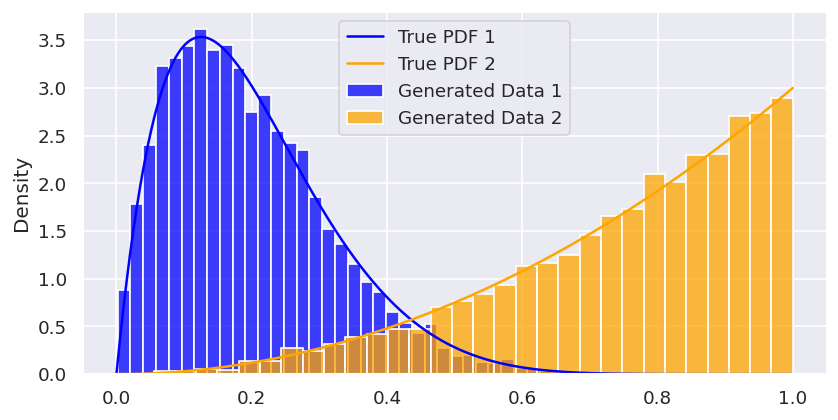

In [8]:
fig = plt.figure(figsize=(8, 4), dpi=120)

# Generated data density distribution
sns.histplot(X1, stat='density', label='Generated Data 1', color='blue')

# True PDF f(x)
x = np.linspace(start=0, stop=1, num=1000)
f = beta_pdf(x, a1, b1)
plt.plot(x, f, label='True PDF 1', color='blue')

# Generated data density distribution
sns.histplot(X2, stat='density', label='Generated Data 2', color='orange')

# True PDF f(x)
x = np.linspace(start=0, stop=1, num=1000)
f = beta_pdf(x, a2, b2)
plt.plot(x, f, label='True PDF 2', color='orange')

plt.legend()
plt.show()

In [9]:
a = 2
b = 8
N = 5000

p_pdf = lambda x: beta_pdf(x, a, b)
q_pdf = uniform_pdf
q_sample = uniform_sample

X1 = rejection_sampling(p_pdf, q_pdf, q_sample, 3.0, N=N1)
X2 = rejection_sampling(p_pdf, q_pdf, q_sample, 2.0, N=N2)
X3 = rejection_sampling(p_pdf, q_pdf, q_sample, 1.0, N=N2)

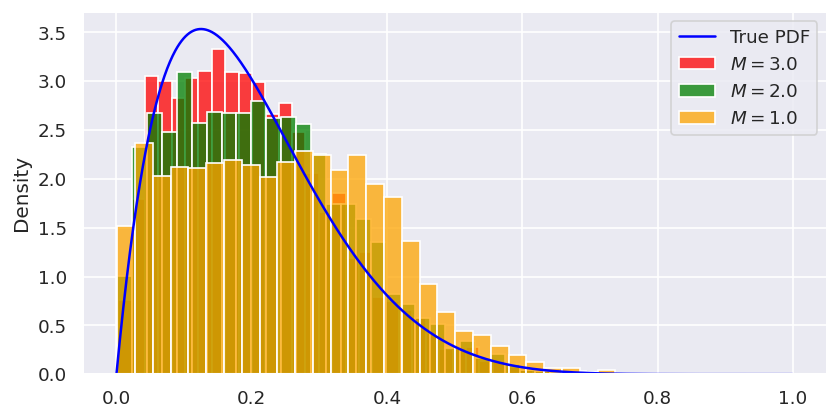

In [10]:
fig = plt.figure(figsize=(8, 4), dpi=120)

# Generated data density distribution
sns.histplot(X1, stat='density', label='$M = 3.0$', color='red')
sns.histplot(X2, stat='density', label='$M = 2.0$', color='green')
sns.histplot(X3, stat='density', label='$M = 1.0$', color='orange')

# True PDF f(x)
x = np.linspace(start=0, stop=1, num=1000)
f = beta_pdf(x, a, b)
plt.plot(x, f, label='True PDF', color='blue')

plt.legend()
plt.show()

In [11]:
def normal_pdf(x, mu, sigma):
    return scipy.stats.norm.pdf(x, mu, sigma)

def normal_sample(mu, sigma):
    return np.random.randn() * sigma + mu

In [12]:
a = 2
b = 8
N = 10000

p_pdf = lambda x: beta_pdf(x, a, b)

q1_pdf = uniform_pdf
q1_sample = uniform_sample
X1 = rejection_sampling(p_pdf, q1_pdf, q1_sample, 1.5, N=N)

q2_pdf = lambda x: normal_pdf(x, 0.16, 0.16)
q2_sample = lambda : normal_sample(0.16, 0.16)
X2 = rejection_sampling(p_pdf, q2_pdf, q2_sample, 1.5, N=N)

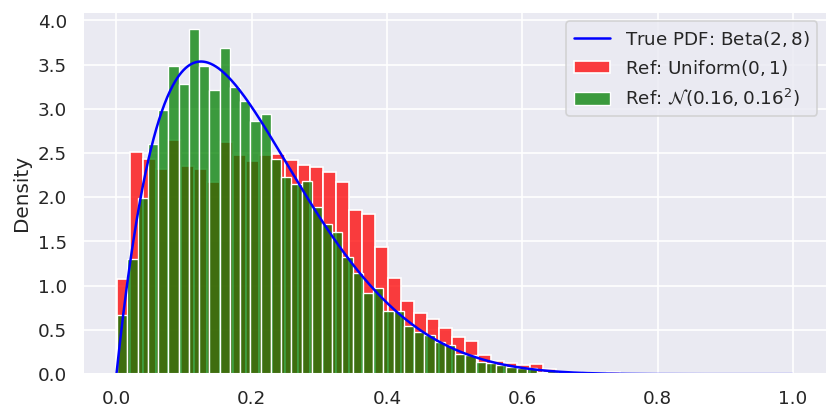

In [13]:
fig = plt.figure(figsize=(8, 4), dpi=120)

# Generated data density distribution
sns.histplot(X1, stat='density', label='Ref: Uniform$(0, 1)$', color='red')
sns.histplot(X2, stat='density', label='Ref: $\mathcal{N}(0.16, 0.16^2)$', color='green')
# sns.histplot(X3, stat='density', label='Generated Data 3', color='orange')

# True PDF f(x)
x = np.linspace(start=0, stop=1, num=1000)
f = beta_pdf(x, a, b)
plt.plot(x, f, label='True PDF: Beta$(2, 8)$', color='blue')

plt.legend()
plt.show()

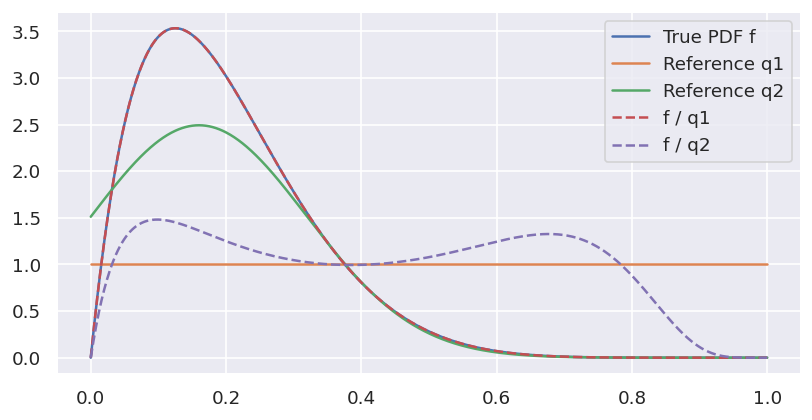

In [14]:
fig = plt.figure(figsize=(8, 4), dpi=120)

x = np.linspace(start=0, stop=1, num=1000)
f = beta_pdf(x, 2, 8)
q1 = uniform_pdf(x, 0.0, 1.0)
q2 = normal_pdf(x, 0.16, 0.16)
plt.plot(x, f, label='True PDF f')
plt.plot(x, q1, label='Reference q1')
plt.plot(x, q2, label='Reference q2')
plt.plot(x, f / q1, label='f / q1', linestyle='dashed')
plt.plot(x, f / q2, label='f / q2', linestyle='dashed')

plt.legend()
plt.show()